<a href="https://colab.research.google.com/github/JuuzouMarques/Python/blob/main/TestesPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# PROPHET
from sklearn import metrics
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation

In [ ]:
filename = 'dados_new3.csv'

In [ ]:
# Importar dados para um DataFrame
df = pd.read_csv(filename, usecols=['INS', 'TEM_INS'], parse_dates=['INS'])
df.rename(columns={'INS': 'ds', 'TEM_INS': 'y'}, inplace = True)

In [ ]:
# Ordenação dos Dados
df.sort_values('ds', inplace=True)

In [ ]:
df.head()

,ds,y
0,2012-01-01 00:00:00,26.6
1,2012-01-01 01:00:00,26.3
2,2012-01-01 02:00:00,26.2
3,2012-01-01 03:00:00,26.0
4,2012-01-01 04:00:00,25.6


In [ ]:
# Ver um resumo dos tipos de variáveis e valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86208 entries, 0 to 86207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      86208 non-null  datetime64[ns]
 1   y       86208 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.0 MB


In [ ]:
# Ver um resumo das principais informações estatísticas
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,ds,y
count,86208,86208.000000
unique,86208,NaN
top,2012-11-11 10:00:00,NaN
freq,1,NaN
first,2012-01-01 00:00:00,NaN
last,2021-10-31 23:00:00,NaN
mean,NaN,26.865638
std,NaN,2.895881
min,NaN,21.200000
25%,NaN,24.493626


In [ ]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
df.set_index('ds', inplace=True)

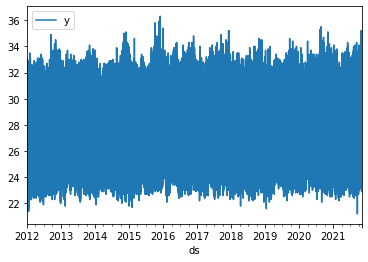

In [ ]:
df.plot()

In [ ]:
df.resample('M').sum()

,y
ds,
2012-01-31,19679.327065
2012-02-29,18051.710351
2012-03-31,19165.146937
2012-04-30,19012.681141
2012-05-31,19702.217595
...,...
2021-06-30,19354.671639
2021-07-31,19972.680359
2021-08-31,20397.733485


In [ ]:
df_mensal = df.resample('M').sum()

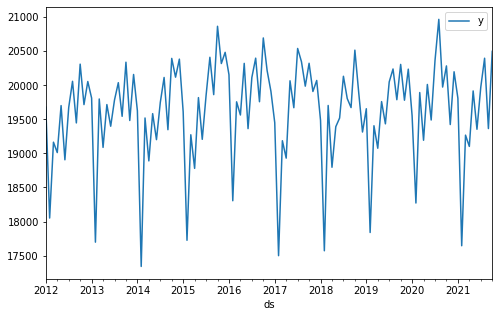

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
df_mensal.plot(ax=ax)